# Model descriptions

The Mitochondrial Retrograde (RTG) Signalling Model is a system of 11 coupled ODEs.

In [1]:
using RetroSignalModel
using ModelingToolkit

@named sys = RtgMTK(; simplify=false)


Model sys with 36 equations
States (36):
  Rtg2A_c(t)
  Rtg2Mks_c(t)
  BmhMks(t)
  Rtg13A_c(t)
  Rtg13I_c(t)
  Rtg3A_c(t)
⋮
Parameters (30):
  k2I [defaults to 1.0]
  n_S [defaults to 1.0]
  ksV [defaults to 1.0]
  ksD [defaults to 1.0]
  mul_S [defaults to 1.0]
  kn2M [defaults to 1.0]
⋮

## Parameter estimation

Simulated annealing (SAMIN) with bounds was used to find a set of parameters that fit exprerimental conditions. The following code is just a demonstration. In peactice we ran the code for much longer.

[Source code](https://github.com/ntumitolab/RetroSignalModel.jl)

In [2]:
using RetroSignalModel
using Optim

optim_params(targetratio=3, optimoptions=Optim.Options(iterations=100, show_trace=true, show_every=10))


Iter     Function value   Gradient norm 
     0     4.771213e-01              NaN


 * time: 14.417295932769775


    10     4.771212e-01              NaN
 * time: 19.610579013824463


    20     7.503527e-01              NaN
 * time: 23.518472909927368


    30     9.499060e-01              NaN
 * time: 27.427124977111816


    40     4.885749e-01              NaN
 * time: 31.3331880569458


    50     6.239914e-01              NaN
 * time: 35.16519498825073


    60     5.767704e-01              NaN
 * time: 39.068016052246094


    70     4.962482e-01              NaN
 * time: 43.00966000556946


    80     4.199331e-01              NaN
 * time: 46.942384004592896


    90     4.283133e-01              NaN
 * time: 50.758256912231445


SAMIN results
NO CONVERGENCE: MAXEVALS exceeded



     Obj. value:           0.38137

       parameter      search width
        95.94731         999.99900 


         4.80265           5.00000 
         5.37021         999.99900 
       429.77213         999.99900 
         6.01627         999.99900 
       867.13359         999.99900 
        37.79521         999.99900 
        53.86821         999.99900 
        51.31396         999.99900 
       514.77603         999.99900 
       195.73608         999.99900 
       255.56565         999.99900 
       337.39836         999.99900 
         5.76125         999.99900 
       232.27003         999.99900 
       722.48373         999.99900 
        85.34188         999.99900 
       368.15902         999.99900 
       784.47771         999.99900 
       332.50347         999.99900 
       757.54210         999.99900 
       251.63085         999.99900 
       612.34513         999.99900 
       187.25967         999.99900 


(res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     3.813664e-01

 * Found with
    Algorithm:     SAMIN

 * Convergence measures
    |x - x'|               = Inf ≰ 1.0e-06
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = Inf ≰ 1.0e-12
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 0.0e+00

 * Work counters
    Seconds run:   54  (vs limit Inf)
    Iterations:    100
    f(x) calls:    100
    ∇f(x) calls:   0
, parammap = Dict{SymbolicUtils.BasicSymbolic{Real}, Float64}(k2I => 95.94731033304312, kn2M => 6.016274705090665, k2M => 867.1335921544978, k13ID => 514.7760348265062, kn13_c => 232.270025781651, k1out => 784.4777143398859, k3outI => 187.25966765242913, knBM => 37.79521150738747, kn13_n => 85.34188348844316, k3inI => 612.34513249146…))

## Valid parameter sets

In [3]:
using RetroSignalModel
using CSV
using DataFrames
using Plots


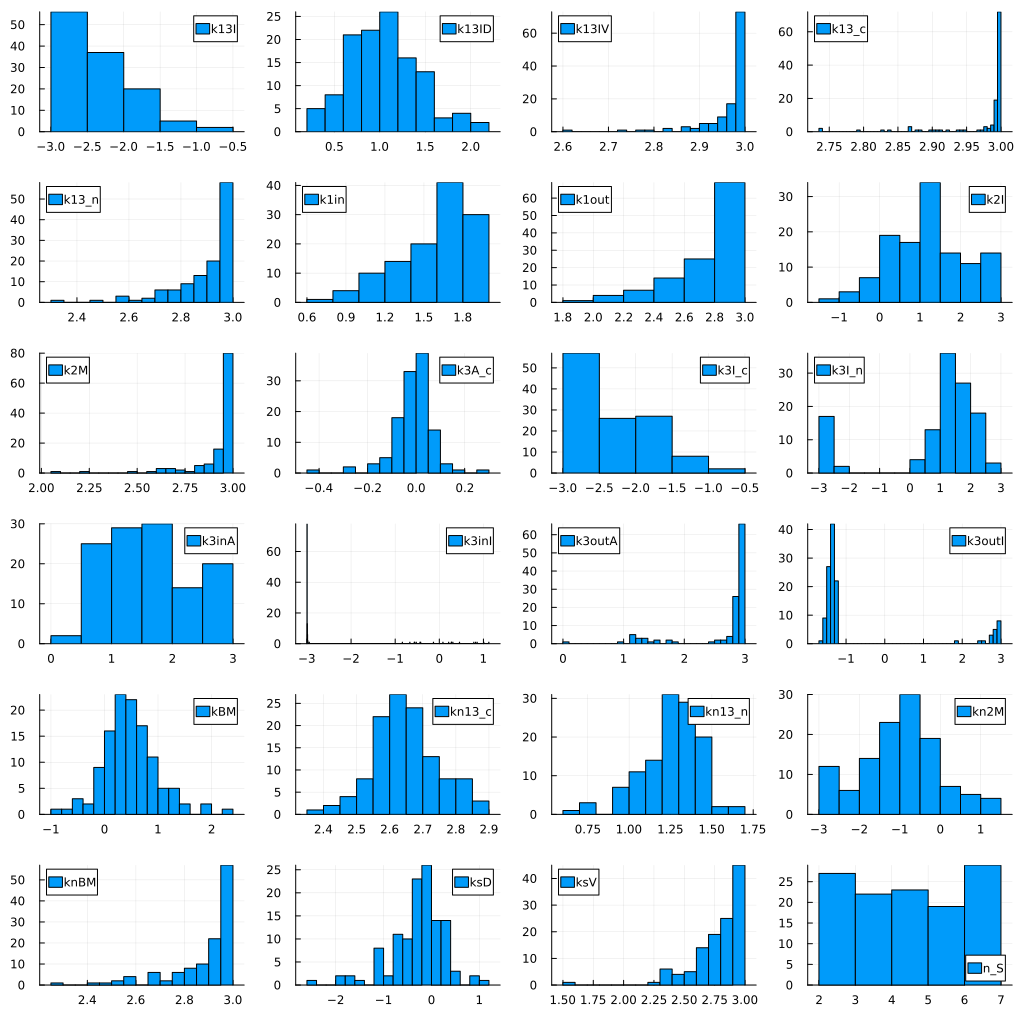

In [4]:
filename = joinpath(dirname(pathof(RetroSignalModel)), "data", "solution_rtgMTK_optim.csv")
dfoptim = let
    df = CSV.read(filename, DataFrame)
    df[!, Not(:n_S)] .= log10.(df[!, Not(:n_S)])
end

res = map(sort(names(dfoptim))) do lab
    histogram(dfoptim[!, lab], label=lab)
end

plot(res..., layout=(6, 4), size=(1024, 1024))
# savefig("optimparams.png")


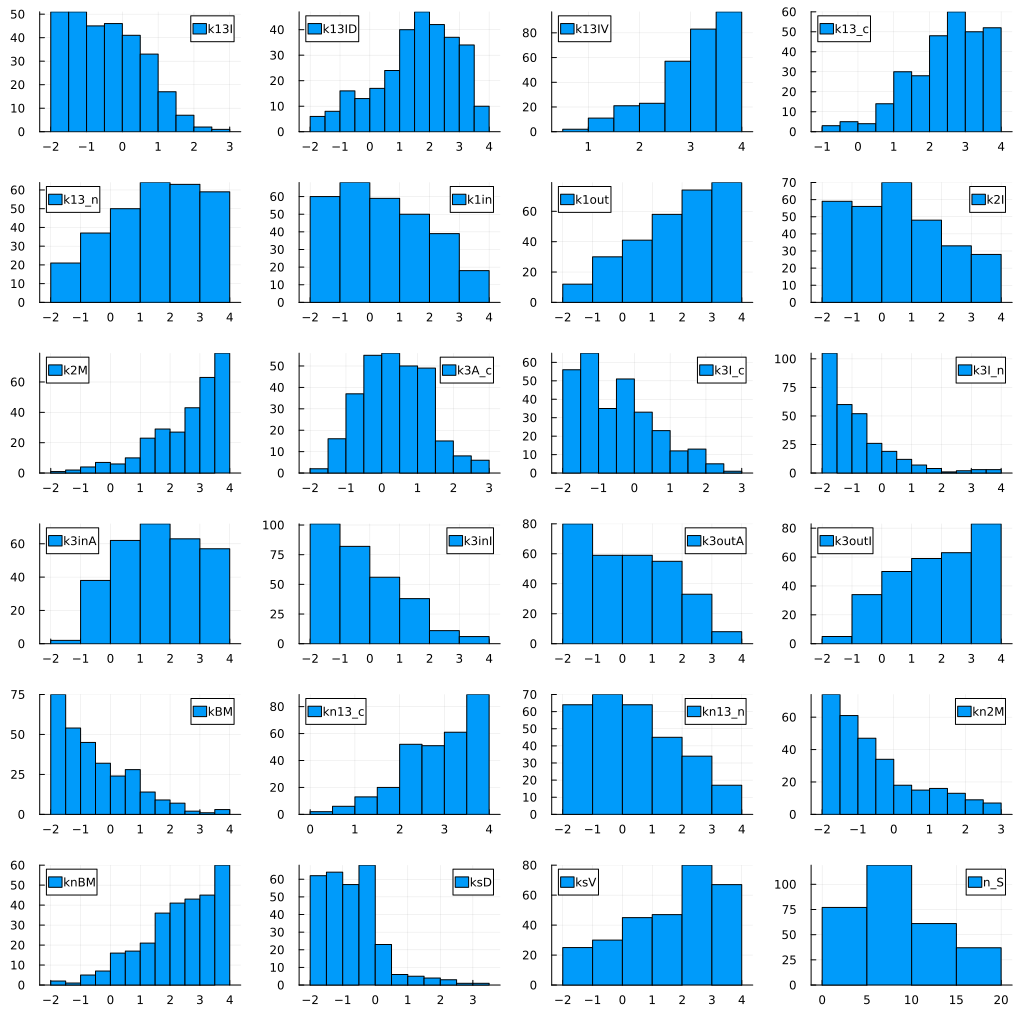

In [5]:
filename = joinpath(dirname(pathof(RetroSignalModel)), "data", "solution_rtgM4.csv")
dforig = let
    df = CSV.read(filename, DataFrame)
    df[!, Not(:n_S)] .= log10.(df[!, Not(:n_S)])
end

res = map(sort(names(dforig))) do lab
    histogram(dforig[!, lab], label=lab)
end

plot(res..., layout=(6, 4), size=(1024, 1024))
# savefig("randomparams.png")
